In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import fuzzywuzzy as fw
from fuzzywuzzy import process
import chardet
from datetime import datetime

In [2]:
# Data from https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
a = np.array([30, 171, 184, 201, 212, 250, 265, 270, 272, 289, 305, 306, 322, 322, 336, 346, 351, 370, 390, 404, 409, 411, 436, 437, 439, 441, 444, 448, 451, 453, 470, 480, 482, 487, 494, 495, 499, 503, 514, 521, 522, 527, 548, 550, 559, 560, 570, 572, 574, 578, 585, 592, 592, 607, 616, 618, 621, 629, 637, 638, 640, 656, 668, 707, 709, 719, 737, 739, 752, 758, 766, 792, 792, 794, 802, 818, 830, 832, 843, 858, 860, 869, 918, 925, 953, 991, 1000, 1005, 1441,2000])

(array([ 1.,  4.,  9.,  8., 19., 15., 10.,  9.,  7.,  6.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  30. ,  128.5,  227. ,  325.5,  424. ,  522.5,  621. ,  719.5,
         818. ,  916.5, 1015. , 1113.5, 1212. , 1310.5, 1409. , 1507.5,
        1606. , 1704.5, 1803. , 1901.5, 2000. ]),
 <a list of 20 Patch objects>)

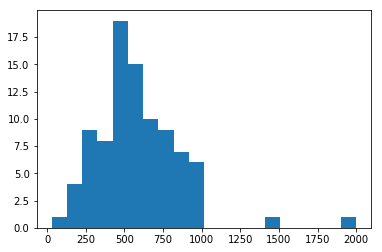

In [3]:
plt.hist(a, bins=20)

In [4]:
print ("Mean: ", np.mean(a))
print ("Median: ", np.median(a))
print ("Range: ", np.ptp(a))
print ("1st Quartile", np.percentile(a,25))
print ("3rd Quartile", np.percentile(a,75))
print ("Inerquartile range: ", np.percentile(a,75)- np.percentile(a,25))
print ("Variance: ", np.var(a))
print ("Std Dev: ", np.std(a))

Mean:  586.4333333333333
Median:  559.5
Range:  1970
1st Quartile 436.25
3rd Quartile 738.5
Inerquartile range:  302.25
Variance:  75558.93444444444
Std Dev:  274.87985456276067


# Tukey's Fences

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8089583c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa808958a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa80894df28>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa808958e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8088e4470>],
 'means': []}

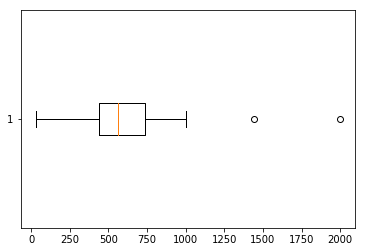

In [5]:
plt.boxplot(a, vert =False)

upper whisker extend by default to q3 + 1.5 *IQR

lower whiser: q1- 1.5* IQR

In [6]:
q1  = np.percentile(a,25)
q3  = np.percentile(a,75)
iqr = q3-q1
lower_inner_fence = q1 - 1.5 * iqr
upper_inner_fence = q3 + 1.5 * iqr
lower_outer_fence = q1 - 3.0 * iqr
upper_outer_fence = q3 + 3.0 * iqr

In [7]:
print ("Lower inner fence: ", lower_inner_fence)
print ("Upper inner fence: ", upper_inner_fence)
print ("Lower outer fence: ", lower_outer_fence)
print ("Upper outer fence: ", upper_outer_fence)

Lower inner fence:  -17.125
Upper inner fence:  1191.875
Lower outer fence:  -470.5
Upper outer fence:  1645.25


In [8]:
from scipy.stats import shapiro
from numpy.random import seed
from numpy.random import randn

# Shaprio-Wilk Test

Evaluates and quantifies how likely that data was drawn from a Gaussian distribution

In [9]:
stat, p = shapiro(a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.891, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
noOutliers = np.array([30, 171, 184, 201, 212, 250, 265, 270, 272, 289, 305, 306, 322, 322, 336, 346, 351, 370, 390, 404, 409, 411, 436, 437, 439, 441, 444, 448, 451, 453, 470, 480, 482, 487, 494, 495, 499, 503, 514, 521, 522, 527, 548, 550, 559, 560, 570, 572, 574, 578, 585, 592, 592, 607, 616, 618, 621, 629, 637, 638, 640, 656, 668, 707, 709, 719, 737, 739, 752, 758, 766, 792, 792, 794, 802, 818, 830, 832, 843, 858, 860, 869, 918, 925, 953, 991, 1000, 1005])
stat, p = shapiro(noOutliers)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.988, p=0.627
Sample looks Gaussian (fail to reject H0)


# Outlier detection via clustering
DBScan: density-based clustering algorithm

Parameters:
* min_samples: mininum number of points to form a cluster.  (how many many members must a cluster have?)
* eps: maximum distance between two points for them be in the same cluster

Noise points - any points not belonging to a cluster

In [14]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 25)
clusters = outlier_detection.fit_predict(a.reshape(-1, 1))
list(clusters).count(-1)

4

In [15]:
clusters

array([-1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4, -1,
        5,  5,  5, -1, -1])

In [16]:
a[clusters == -1]

array([  30,  953, 1441, 2000])

# PyOD on a Simulated Dataset

https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [17]:
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'F2')

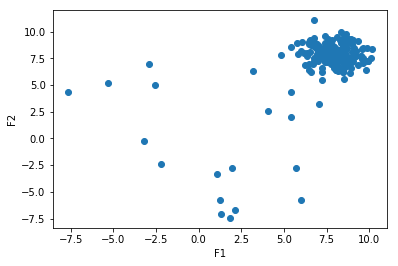

In [25]:
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

In [24]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

No of Errors :  Angle-based Outlier Detector (ABOD) 8
No of Errors :  K Nearest Neighbors (KNN) 2


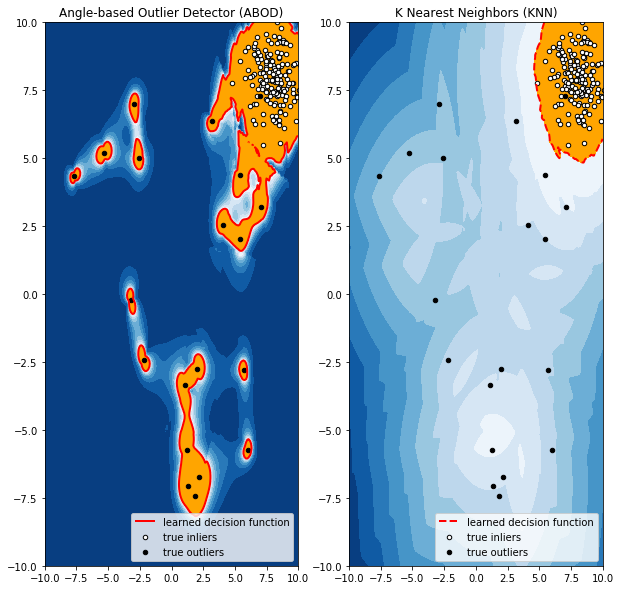

In [26]:
#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 
